In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:


df = pd.read_csv("LoansTrainingSet.csv")

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Kredi Notu Mutlaka 300-800 arası olmalı

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [4]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [5]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [6]:
import seaborn as sns


<AxesSubplot:xlabel='Credit Score', ylabel='Current Loan Amount'>

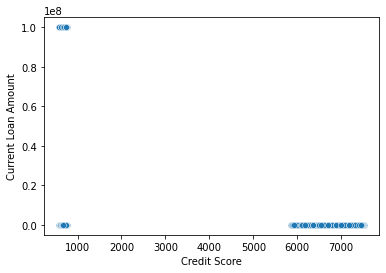

In [7]:
sns.scatterplot(x="Credit Score" , y = "Current Loan Amount" , data = df)

# Boş Verileri Doldurma

In [8]:
df["Credit Score"].value_counts()

747.0     5669
740.0     5537
741.0     5499
746.0     5486
742.0     5219
          ... 
6070.0       3
5980.0       3
5910.0       3
5930.0       2
5860.0       1
Name: Credit Score, Length: 334, dtype: int64

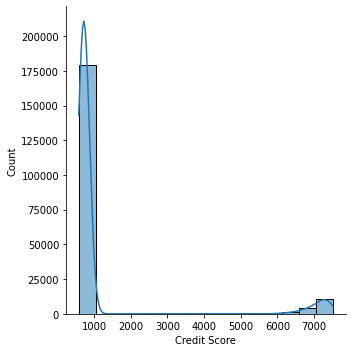

In [9]:
sns.displot(df["Credit Score"],bins=15,kde=True)

#kredi skoru 7000'in üzerinde olanlar var

In [10]:
df["Credit Score"] = df["Credit Score"].mask( df["Credit Score"] > 800, df["Credit Score"]/ 10)


In [11]:
#df_temp["Credit Score"].value_counts()
#hepsi 1000'den büyük olduğunu doğruladık

In [12]:
#df_temp["Credit Score"] = df_temp["Credit Score"]/10
#df_temp["Credit Score"].value_counts()

In [13]:
#df.append(df_temp)
#df.shape

In [14]:
df["Credit Score"].value_counts()

740.0    5877
747.0    5862
741.0    5843
746.0    5736
742.0    5531
         ... 
590.0      22
589.0      22
585.0      21
593.0      19
591.0      18
Name: Credit Score, Length: 167, dtype: int64

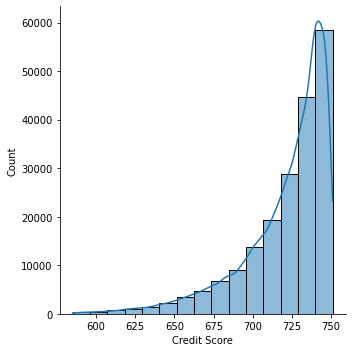

In [15]:
sns.displot(df["Credit Score"],bins=15,kde=True)
#300 ile 800 arasında

In [16]:
df["Credit Score"].fillna(df["Credit Score"].mean() , inplace= True)

In [17]:
df["Years in current job"].value_counts()

10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: Years in current job, dtype: int64

In [18]:
df["Years in current job"].fillna(df["Years in current job"].mode()[0] , inplace = True)

In [19]:
df["Annual Income"].value_counts()

60684.0     31
49630.0     30
61188.0     30
59646.0     30
61134.0     28
            ..
65276.0      1
254462.0     1
126888.0     1
98337.0      1
30854.0      1
Name: Annual Income, Length: 60558, dtype: int64

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Annual Income', ylabel='Annual Income'>

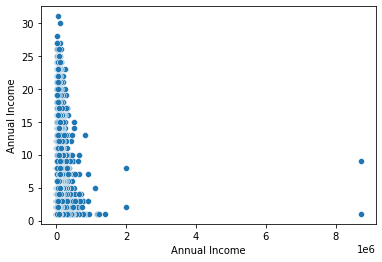

In [20]:
y = df["Annual Income"].value_counts()
x = df["Annual Income"]
sns.scatterplot(x, y, data=df)

<AxesSubplot:>

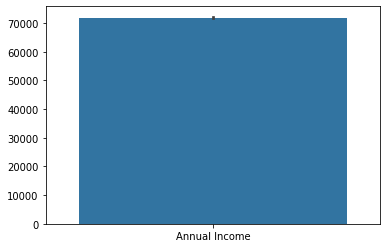

In [21]:
sns.barplot(data = df[["Annual Income"]])
#anlamsız veri görselleştirmesi

In [25]:
df["Annual Income"].fillna(df["Annual Income"].mean() , inplace = True)

In [26]:
df["Annual Income"].isnull().sum()

0

In [27]:
del df["Months since last delinquent"]

In [28]:

df["Bankruptcies"].value_counts()                       

0.0    229661
1.0     25605
2.0       957
3.0       180
4.0        33
5.0        15
6.0         3
7.0         1
Name: Bankruptcies, dtype: int64

In [29]:
df["Bankruptcies"] = df["Bankruptcies"].fillna("0")

In [30]:
df["Tax Liens"].value_counts()                       

0.0     252322
1.0       3276
2.0        872
3.0        247
4.0        124
5.0         61
6.0         30
9.0         10
8.0          8
7.0          6
10.0         3
11.0         2
Name: Tax Liens, dtype: int64

In [31]:
df["Tax Liens"] = df["Tax Liens"].fillna("0")

In [32]:
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    256984 non-null  object 
 1   Customer ID                256984 non-null  object 
 2   Loan Status                256984 non-null  object 
 3   Current Loan Amount        256984 non-null  int64  
 4   Term                       256984 non-null  object 
 5   Credit Score               256984 non-null  float64
 6   Years in current job       256984 non-null  object 
 7   Home Ownership             256984 non-null  object 
 8   Annual Income              256984 non-null  float64
 9   Purpose                    256984 non-null  object 
 10  Monthly Debt               256984 non-null  object 
 11  Years of Credit History    256984 non-null  float64
 12  Number of Open Accounts    256984 non-null  int64  
 13  Number of Credit Problems  25

In [34]:

df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,12,0,17391,37081,0.0,0.0


# Feature Engineering

In [35]:
df_original = df

#model kurduktan sonra sileceğimiz sütunlar lazım olabilir

In [36]:

df["Number of Open Accounts"].value_counts()
#astype yaparak deneyecem

9     24412
10    23306
8     23140
11    21577
7     20851
12    19056
6     17454
13    15987
14    13649
5     12232
15    10833
16     8982
17     7258
4      7225
18     5801
19     4706
20     3612
3      3362
21     2815
22     2207
23     1725
24     1371
2      1104
25     1011
26      746
27      580
28      404
29      303
30      236
31      207
32      181
33      113
34      104
35       79
36       61
37       58
38       41
1        37
39       33
40       26
41       24
42       14
45        9
43        9
47        7
0         5
44        5
76        4
50        3
53        3
46        3
48        3
55        2
52        2
58        2
56        1
49        1
51        1
54        1
Name: Number of Open Accounts, dtype: int64

In [37]:
#df["Number of Open Accounts"]=df["Number of Open Accounts"].astype("category")
# banka hesabı sayısı ne kadar olduğu önemli değil bence

In [38]:
df.drop(["Loan ID","Customer ID" , "Number of Open Accounts"] , axis = 1 , inplace= True)  

In [39]:
df["Loan Status"].value_counts()

Fully Paid     176191
Charged Off     80793
Name: Loan Status, dtype: int64

In [40]:
df["Term"].value_counts()

Short Term    192632
Long Term      64352
Name: Term, dtype: int64

In [41]:
df["Years in current job"].value_counts()

#bu değeri floata çevirmek doğru olmaz

10+ years    90372
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: Years in current job, dtype: int64

In [42]:
df["Home Ownership"].value_counts()


Home Mortgage    124477
Rent             109010
Own Home          22923
HaveMortgage        574
Name: Home Ownership, dtype: int64

In [43]:
df["Purpose"].value_counts()

#iki farklı other var bunları birbirne eklemek lazım

Debt Consolidation      203911
Home Improvements        14915
other                    14268
Other                     9667
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: Purpose, dtype: int64

In [44]:
df.loc[df["Purpose"] == "Other", "Purpose"] = "other"

In [45]:
df["Purpose"].value_counts()


Debt Consolidation      203911
other                    23935
Home Improvements        14915
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: Purpose, dtype: int64

In [46]:
#Dolarları temizlememiz gerekir
df["Monthly Debt"] = df["Monthly Debt"].str.extract("(\d+)")

In [47]:
df["Monthly Debt"] = df["Monthly Debt"].astype(float)
#object veriyi floata dönüştürmüş olduk

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Years of Credit History', ylabel='Years of Credit History'>

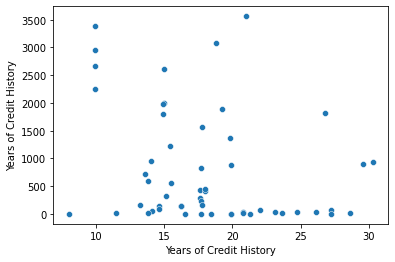

In [48]:
sns.scatterplot(df["Years of Credit History"],df["Years of Credit History"].value_counts())

In [49]:
#df["Maximum Open Credit"] = df["Maximum Open Credit"].astype(float)

In [50]:
# #VALUE! diğe bir değer yüzünden floata çeviremedik
df[df["Maximum Open Credit"]=="#VALUE!"]

#df["Maximum Open Credit"].replace("#VALUE!",np.nan,inplace=True)
#bu kod da tek satır ile

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
184662,Charged Off,1470,Short Term,721.203197,2 years,Rent,71952.716187,Debt Consolidation,506.0,15.3,0,0,#VALUE!,0.0,0.0
184663,Charged Off,1470,Short Term,725.000000,2 years,Rent,39200.000000,Debt Consolidation,506.0,15.3,0,0,#VALUE!,0.0,0.0
187512,Charged Off,23897,Long Term,697.000000,7 years,Home Mortgage,49785.000000,Home Improvements,1.0,13.0,0,0,#VALUE!,0.0,0.0
187513,Charged Off,23897,Long Term,697.000000,7 years,Home Mortgage,49785.000000,Home Improvements,1.0,13.0,0,0,#VALUE!,0.0,0.0


In [52]:
df.loc[df["Maximum Open Credit"]=="#VALUE!" , "Maximum Open Credit"] = 35273
#ortalama ile doldurmuş olduk

In [53]:
df["Maximum Open Credit"] = df["Maximum Open Credit"].astype(float)

In [54]:
df["Bankruptcies"].value_counts()

0.0    229661
1.0     25605
2.0       957
0         529
3.0       180
4.0        33
5.0        15
6.0         3
7.0         1
Name: Bankruptcies, dtype: int64

In [55]:
df["Bankruptcies"] = df["Bankruptcies"].astype(float)

In [56]:
df["Tax Liens"].value_counts()
#iki ayrı sıfırın olması floata çevrilmesiyle beraber düzelir

0.0     252322
1.0       3276
2.0        872
3.0        247
4.0        124
5.0         61
6.0         30
0           23
9.0         10
8.0          8
7.0          6
10.0         3
11.0         2
Name: Tax Liens, dtype: int64

In [57]:
df["Tax Liens"] = df["Tax Liens"].astype(float)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                256984 non-null  object 
 1   Current Loan Amount        256984 non-null  int64  
 2   Term                       256984 non-null  object 
 3   Credit Score               256984 non-null  float64
 4   Years in current job       256984 non-null  object 
 5   Home Ownership             256984 non-null  object 
 6   Annual Income              256984 non-null  float64
 7   Purpose                    256984 non-null  object 
 8   Monthly Debt               256984 non-null  float64
 9   Years of Credit History    256984 non-null  float64
 10  Number of Credit Problems  256984 non-null  int64  
 11  Current Credit Balance     256984 non-null  int64  
 12  Maximum Open Credit        256984 non-null  float64
 13  Bankruptcies               25

In [59]:
y = df["Loan Status"]
df.drop(["Loan Status"], axis = 1 , inplace= True)

__Dummy Variable__

In [60]:
df_dum = pd.get_dummies(df , drop_first = True)

In [61]:
df_dum.shape

(256984, 32)

In [62]:
df_joined = result = pd.concat([df_dum, y], axis=1, join='inner')


In [63]:
df_joined.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Current Loan Amount             256984 non-null  int64  
 1   Credit Score                    256984 non-null  float64
 2   Annual Income                   256984 non-null  float64
 3   Monthly Debt                    256984 non-null  float64
 4   Years of Credit History         256984 non-null  float64
 5   Number of Credit Problems       256984 non-null  int64  
 6   Current Credit Balance          256984 non-null  int64  
 7   Maximum Open Credit             256984 non-null  float64
 8   Bankruptcies                    256984 non-null  float64
 9   Tax Liens                       256984 non-null  float64
 10  Term_Short Term                 256984 non-null  uint8  
 11  Years in current job_10+ years  256984 non-null  uint8  
 12  Years in current

In [64]:
from pycaret.classification import *

exp_name = setup(data = df_joined , target = "Loan Status")

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8152,0.8582,0.9181,0.8300,0.8718,0.5439,0.5528,9.1620
rf,Random Forest Classifier,0.8063,0.8517,0.9094,0.8254,0.8653,0.5230,0.5309,8.5320
dt,Decision Tree Classifier,0.7271,0.7046,0.7657,0.8233,0.7935,0.3931,0.3953,0.8930
lightgbm,Light Gradient Boosting Machine,0.7251,0.7623,0.8875,0.7543,0.8155,0.2901,0.3054,0.6270
gbc,Gradient Boosting Classifier,0.7193,0.7538,0.9003,0.7437,0.8145,0.2588,0.2799,12.9460
ada,Ada Boost Classifier,0.7157,0.7486,0.8964,0.7420,0.8119,0.2506,0.2704,2.6500
lda,Linear Discriminant Analysis,0.7113,0.7308,0.9332,0.7245,0.8157,0.1960,0.2346,0.7770
ridge,Ridge Classifier,0.7098,0.0000,0.9462,0.7188,0.8170,0.1756,0.2227,0.0970
dummy,Dummy Classifier,0.6845,0.5000,1.0000,0.6845,0.8127,0.0000,0.0000,0.0640
lr,Logistic Regression,0.6844,0.6632,0.9997,0.6845,0.8126,-0.0001,-0.0020,1.6510


Extra tree classsifier veya random forest classifier bize istedğimiz başarıyı verir.